<a href="https://colab.research.google.com/github/ASHUTOSH-THAPA/Lnaggraph/blob/main/sequential_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
pip install langgraph

In [28]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [29]:
class bmi_state(TypedDict):
  weight:float
  height:float
  bmi:float
  label_bmi:str


In [30]:
graph=StateGraph(bmi_state)

In [31]:
def cal_bmi(state:bmi_state)-> bmi_state:
  height=state['height']
  weight=state['weight']
  bmi=weight/(height**2)
  state['bmi']=round(bmi,2)
  return state

In [32]:
def label_bmi(state:bmi_state)->bmi_state:
  bmi=state['bmi']
  if bmi<18.5:
    state['label_bmi']='Underweight'
  elif 18.5<=bmi<25:
    state['label_bmi']='Normal'
  elif 25 <= bmi <=30:
    state['label_bmi']='overweight'
  else:
    state['label_bmi']='obese'
  return state

In [33]:
graph.add_node('cal_bmi',cal_bmi)
graph.add_node('label_bmi',label_bmi)
graph.add_edge(START,'cal_bmi')
graph.add_edge('cal_bmi','label_bmi')
graph.add_edge('label_bmi',END)

In [34]:
workflow=graph.compile()

In [35]:
output_state=workflow.invoke({'weight':80,'height':1.73})

In [36]:
print(output_state)

{'weight': 80, 'height': 1.73, 'bmi': 26.73, 'label_bmi': 'overweight'}


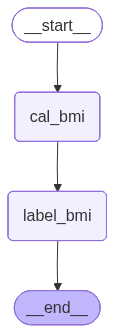

In [37]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())